In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [30]:
b=1
k=3000
M=2
m1=1

In [31]:
def plant(omega):
    
    s = omega*1j
    
#     b=1
#     k=3000
#     M=2
#     m1=1
    
    num = b*s+k
    denom = s**2*( M*m1*s**2 + (M+m1)*b*s + k*(M+m1) )
    
    return num/denom

In [47]:
def controller(omega):
    
    s = omega*1j

#     M=2
#     m1=1
    tau=0.#1
    wc = 0.4* 2*np.pi
    out = wc*(M+m1)*s*np.exp(-s*tau)
    
    return out

def controller2(omega):
    
    s = omega*1j

#     M=2
#     m1=1
    tau=0.#1
    wc = 0.4* 2*np.pi
    
    denom = b*s+k
    num = wc*s*( M*m1*s**2 + (M+m1)*b*s + k*(M+m1) )*np.exp(-s*tau)
    
    out = num/denom#wc*(M+m1)*s*
    
    return out

<IPython.core.display.Javascript object>


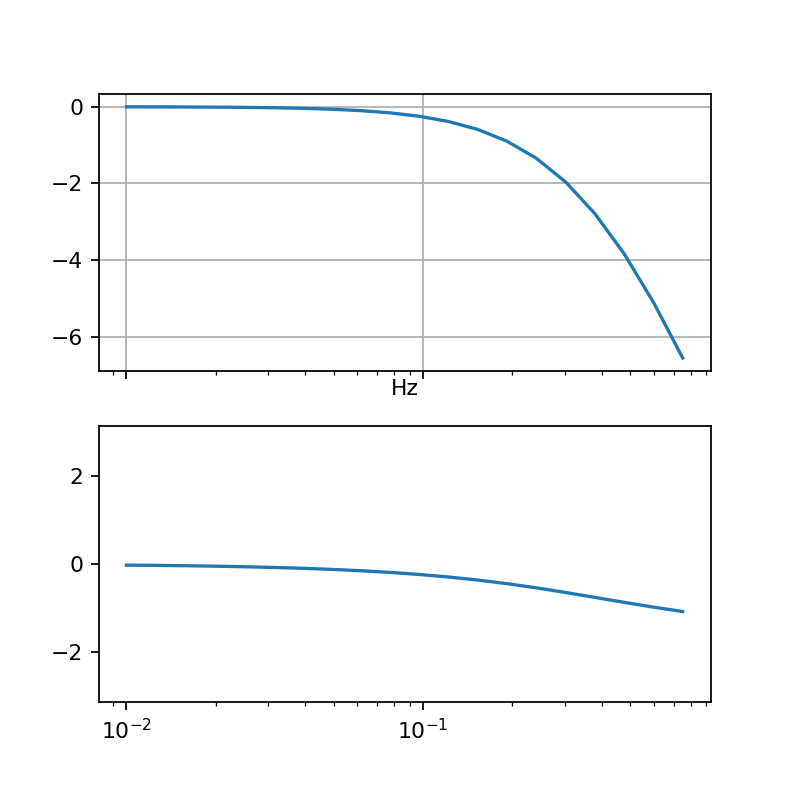

(-3.141592653589793, 3.141592653589793)

In [52]:
%matplotlib notebook
freqs = np.logspace(-2, np.log10(0.75), num=20, 
                     endpoint=True, base=10.0, dtype=None, axis=0)
L = lambda freq: controller2(2*np.pi*freq)*plant(2*np.pi*freq)  #@@@@@@

H = lambda freq: L(freq)/ (1+L(freq))
y_p = H(freqs)

# y_l = controller2(2*np.pi*freqs)*plant(2*np.pi*freqs)
# y_h = y_l/ (1+y_l) controller2(2*np.pi*freqs)*plant(2*np.pi*freqs)

fig, ax = plt.subplots(2,1, figsize=(5,5), sharex=True)
ax[0].plot(freqs, 20*np.log10(abs(y_p)))
ax[1].plot(freqs, np.angle(y_p))
ax[0].set_xscale('log')
ax[0].grid(True)
ax[0].set_xlabel('Hz')
ax[1].set_ylim(-np.pi, np.pi)

In [ ]:
# plot it for different values of k
# 500< k <5000